In [119]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
X = np.array([[-2],
              [1],
              [2],
              [3],
              [4]])

Y = np.array([[4],
              [5],
              [2],
              [2],
              [8]])

In [121]:

np.random.seed(42)
W1 = np.random.randint(-5, 6, (1, 3))  # Kích thước (1, 3) cho lớp ẩn đầu tiên
b1 = np.random.randint(-5, 6, (3, 1))  # Kích thước (3, 1) cho lớp ẩn đầu tiên

W2 = np.random.randint(-5, 6, (3, 4))  # Kích thước (3, 4) cho lớp ẩn thứ hai
b2 = np.random.randint(-5, 6, (4, 1))  # Kích thước (4, 1) cho lớp ẩn thứ hai

W3 = np.random.randint(-5, 6, (4, 1))  # Kích thước (4, 1) cho lớp đầu ra
b3 = np.random.randint(-5, 6, (1, 1))  # Kích thước (1, 1) cho lớp đầu ra

print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)
print("W3:", W3)
print("b3:", b3)

W1: [[ 1 -2  5]]
b1: [[ 2]
 [-1]
 [ 1]]
W2: [[ 4 -3  1  5]
 [ 5  2 -1 -2]
 [ 2  2 -3  0]]
b2: [[-1]
 [-4]
 [ 2]
 [ 0]]
W3: [[-4]
 [-1]
 [-5]
 [ 4]]
b3: [[0]]


In [122]:
def relu(z):
    return np.maximum(z, 0)

In [123]:
def relu_derivative(z):
    return np.where(z > 0, 1, 0)

In [124]:
Z1 = X.dot(W1) + b1.T 
H1 = relu(Z1)
Z2 = H1.dot(W2) + b2.T  
H2 = relu(Z2)
Y_pred = (H2.dot(W3)).T + b3
J = np.linalg.norm(Y_pred - Y)**2 / len(Y)  # Hàm mất mát

In [125]:
Z1, H1, Z2, H2, Y_pred, J

(array([[ 0,  3, -9],
        [ 3, -3,  6],
        [ 4, -5, 11],
        [ 5, -7, 16],
        [ 6, -9, 21]]),
 array([[ 0,  3,  0],
        [ 3,  0,  6],
        [ 4,  0, 11],
        [ 5,  0, 16],
        [ 6,  0, 21]]),
 array([[ 14,   2,  -1,  -6],
        [ 23,  -1, -13,  15],
        [ 37,   6, -27,  20],
        [ 51,  13, -41,  25],
        [ 65,  20, -55,  30]]),
 array([[14,  2,  0,  0],
        [23,  0,  0, 15],
        [37,  6,  0, 20],
        [51, 13,  0, 25],
        [65, 20,  0, 30]]),
 array([[ -58,  -32,  -74, -117, -160]]),
 np.float64(52970.40000000001))

In [126]:
gradient_J_Y_pred = 2 / len(Y) * (Y_pred - Y)
print("gradient_J_Y_pred:", gradient_J_Y_pred.shape)

gradient_J_H2 = gradient_J_Y_pred.dot(W3.T)  # Sửa nhân với W3.T thay vì W2.T
gradient_J_W3 = H2.T.dot(gradient_J_Y_pred)
gradient_J_b3 = gradient_J_Y_pred.sum(axis=0, keepdims=True)

gradient_J_Z2 = gradient_J_H2 * relu_derivative(Z2)
gradient_J_H1 = gradient_J_Z2.dot(W2.T)
gradient_J_W2 = H1.T.dot(gradient_J_Z2)
gradient_J_b2 = gradient_J_Z2.sum(axis=0, keepdims=True)

gradient_J_Z1 = gradient_J_H1 * relu_derivative(Z1)
gradient_J_W1 = X.T.dot(gradient_J_Z1)
gradient_J_b1 = gradient_J_Z1.sum(axis=0, keepdims=True)

gradient_J_Y_pred: (5, 5)


ValueError: shapes (5,5) and (1,4) not aligned: 5 (dim 1) != 1 (dim 0)

In [ ]:
gradient_J_Y_pred, gradient_J_H2, gradient_J_W3, gradient_J_b3, gradient_J_Z2,


(array([[-24.8],
        [-14.8],
        [-30.4],
        [-47.6],
        [-67.2]]),
 array([[  99.2,   24.8,  124. ,  -99.2],
        [  59.2,   14.8,   74. ,  -59.2],
        [ 121.6,   30.4,  152. , -121.6],
        [ 190.4,   47.6,  238. , -190.4],
        [ 268.8,   67.2,  336. , -268.8]]),
 array([[-8608. ],
        [-2194.8],
        [    0. ],
        [-4036. ]]),
 array([[-184.8]]),
 array([[  99.2,   24.8,    0. ,   -0. ],
        [  59.2,    0. ,    0. ,  -59.2],
        [ 121.6,   30.4,    0. , -121.6],
        [ 190.4,   47.6,    0. , -190.4],
        [ 268.8,   67.2,    0. , -268.8]]))

In [ ]:
gradient_J_H1, gradient_J_W2, gradient_J_b2,gradient_J_Z1, gradient_J_W1, gradient_J_b1

(array([[ 322.4,  545.6,  248. ],
        [ -59.2,  414.4,  118.4],
        [-212.8,  912. ,  304. ],
        [-333.2, 1428. ,  476. ],
        [-470.4, 2016. ,  672. ]]),
 array([[  3228.8,    762.8,      0. ,  -3228.8],
        [   297.6,     74.4,      0. ,      0. ],
        [ 10384. ,   2507.2,      0. , -10384. ]]),
 array([[ 739.2,  170. ,    0. , -640. ]]),
 array([[   0. ,  545.6,    0. ],
        [ -59.2,    0. ,  118.4],
        [-212.8,    0. ,  304. ],
        [-333.2,    0. ,  476. ],
        [-470.4,    0. ,  672. ]]),
 array([[-3366. , -1091.2,  4842.4]]),
 array([[-1075.6,   545.6,  1570.4]]))

In [ ]:
np.linalg.norm(gradient_J_W1),np.linalg.norm(gradient_J_b1), np.linalg.norm(gradient_J_W2), np.linalg.norm(gradient_J_b2), np.linalg.norm(gradient_J_W3), np.linalg.norm(gradient_J_b3), 

(np.float64(5997.4587284949275),
 np.float64(1980.0886040781104),
 np.float64(15603.436406125416),
 np.float64(992.4296650141007),
 np.float64(9757.259197131129),
 np.float64(184.8))

In [ ]:
# Cập nhật tham số
W1 = W1 - learning_rate * gradient_J_W1
b1 = b1 - learning_rate * gradient_J_b1

W2 = W2 - learning_rate * gradient_J_W2
b2 = b2 - learning_rate * gradient_J_b2

W3 = W3 - learning_rate * gradient_J_W3
b3 = b3 - learning_rate * gradient_J_b3

In [ ]:
W1, b1, W2, b2, W3, b3

(array([[ 337.6 ,  107.12, -479.24]]),
 array([[ 109.56,  -52.56, -155.04],
        [ 106.56,  -55.56, -158.04],
        [ 108.56,  -53.56, -156.04]]),
 array([[-3.1888e+02, -7.9280e+01,  1.0000e+00,  3.2788e+02],
        [-2.4760e+01, -5.4400e+00, -1.0000e+00, -2.0000e+00],
        [-1.0364e+03, -2.4872e+02, -3.0000e+00,  1.0384e+03]]),
 array([[-74.92, -18.  ,  -1.  ,  63.  ],
        [-77.92, -21.  ,  -4.  ,  60.  ],
        [-71.92, -15.  ,   2.  ,  66.  ],
        [-73.92, -17.  ,   0.  ,  64.  ]]),
 array([[856.8 ],
        [218.48],
        [ -5.  ],
        [407.6 ]]),
 array([[18.48]]))

In [ ]:
iter = 1000
tolerance = 0.001
learning_rate = 0.1
step = 0
history = []

In [130]:
import numpy as np

# Dữ liệu đầu vào
X = np.array([[-2], [1], [2], [3], [4]])
Y = np.array([[4], [5], [2], [2], [8]])

# Khởi tạo các siêu tham số
learning_rate = 0.01
tolerance = 1e-5
iter_max = 1000
step = 0
history = []

# Khởi tạo trọng số và độ chệch (chuyển sang float64)
# np.random.seed(42)
W1 = np.random.randint(-5, 6, (1, 3))
b1 = np.random.randint(-5, 6, (1, 3))
W2 = np.random.randint(-5, 6, (3, 4))
b2 = np.random.randint(-5, 6, (1, 4))
W3 = np.random.randint(-5, 6, (4, 1))
b3 = np.random.randint(-5, 6, (1, 1))

print("W1:", W1)
print("b1:", b1)

print("W2:", W2)
print("b2:", b2)

print("W3:", W3)
print("b3:", b3)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# Vòng lặp huấn luyện
while step < iter_max:
    step += 1

    # Lan truyền tiến
    Z1 = X.dot(W1) + b1
    H1 = relu(Z1)
    Z2 = H1.dot(W2) + b2
    H2 = relu(Z2)
    Y_pred = H2.dot(W3) + b3
    J = np.linalg.norm(Y_pred - Y)**2 / len(Y)

    history.append(J)

    # Lan truyền ngược
    gradient_J_Y_pred = 2/len(Y) * (Y_pred - Y)

    gradient_J_H2 = gradient_J_Y_pred.dot(W3.T)
    gradient_J_W3 = H2.T.dot(gradient_J_Y_pred)
    gradient_J_b3 = gradient_J_Y_pred.sum(axis=0)

    gradient_J_Z2 = gradient_J_H2 * relu_derivative(Z2)
    gradient_J_H1 = gradient_J_Z2.dot(W2.T)
    gradient_J_W2 = H1.T.dot(gradient_J_Z2)
    gradient_J_b2 = gradient_J_Z2.sum(axis=0)

    gradient_J_Z1 = gradient_J_H1 * relu_derivative(Z1)
    gradient_J_W1 = X.T.dot(gradient_J_Z1)
    gradient_J_b1 = gradient_J_Z1.sum(axis=0)

    W1 = W1 - learning_rate * gradient_J_W1
    b1 = b1 - learning_rate * gradient_J_b1

    W2 = W2 - learning_rate * gradient_J_W2
    b2 = b2 - learning_rate * gradient_J_b2

    W3 = W3 - learning_rate * gradient_J_W3
    b3 = b3 - learning_rate * gradient_J_b3

    # Điều kiện dừng
    if (np.linalg.norm(gradient_J_W1) < tolerance and
        np.linalg.norm(gradient_J_b1) < tolerance and
        np.linalg.norm(gradient_J_W2) < tolerance and
        np.linalg.norm(gradient_J_b2) < tolerance and
        np.linalg.norm(gradient_J_W3) < tolerance and
        np.linalg.norm(gradient_J_b3) < tolerance):
        break

print("Số bước:", step)
print("Giá trị cuối cùng:", J)
print("Dự đoán:", Y_pred.flatten())
print("Thực tế:", Y.flatten())

W1: [[ 2 -3 -5]]
b1: [[-2 -4  2]]
W2: [[-2 -4  0  0]
 [ 4 -2  0 -4]
 [ 4 -4  4 -2]]
b2: [[2 1 3 2]]
W3: [[-1]
 [-4]
 [-1]
 [ 2]]
b3: [[4]]
Số bước: 658
Giá trị cuối cùng: 4.9500000000361
Dự đoán: [3.99999817 4.25000665 4.25000665 4.25000665 4.25000665]
Thực tế: [4 5 2 2 8]


In [131]:
# Dự báo giá trị Y(-1)
X_test = np.array([[-1]])  # Dữ liệu đầu vào cho dự báo
Z1_test = X_test.dot(W1) + b1
H1_test = relu(Z1_test)
Z2_test = H1_test.dot(W2) + b2
H2_test = relu(Z2_test)
Y_pred_test = H2_test.dot(W3) + b3

print("Dự báo tại X_test = -1:", Y_pred_test)

Dự báo tại X_test = -1: [[3.9999982]]


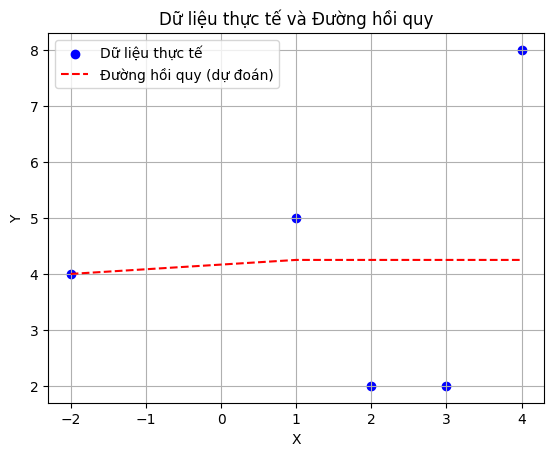

In [132]:
Z1 = X.dot(W1) + b1  # Cộng b1 có dạng (1, 4)
H1 = relu(Z1)
Z2 = H1.dot(W2) + b2  # Cộng b2 có dạng (1, 2)
H2 = relu(Z2)
Y_pred_2 = H2.dot(W3) + b3  # Cộng b3 có dạng (1, 1)

# Vẽ đồ thị dữ liệu thực tế và đường hồi quy
plt.scatter(X, Y, color='blue', label='Dữ liệu thực tế')  # Dữ liệu thực tế
plt.plot(X, Y_pred_2, color='red', label='Đường hồi quy (dự đoán)', linestyle='--')  # Đường hồi quy
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dữ liệu thực tế và Đường hồi quy')
plt.legend()
plt.grid(True)
plt.show()